In [107]:
# Import Dependencies
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [137]:
# Extracting final dataset for ML
path = "Final_Movies_dataset.csv"
movies_df = pd.read_csv(path)
movies_df.columns.tolist()

['budget_ds-movies',
 'gross',
 'score',
 'popularity',
 'revenue',
 'title',
 'Ave_runtime',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Votes_Count',
 'company_Columbia Pictures',
 'company_Columbia Pictures Corporation',
 'company_Dimension Films',
 'company_DreamWorks',
 'company_DreamWorks Animation',
 'company_Lionsgate',
 'company_Marvel Studios',
 'company_Metro-Goldwyn-Mayer (MGM)',
 'company_Millennium Films',
 'company_Miramax',
 'company_New Line Cinema',
 'company_Other',
 'company_Paramount Pictures',
 'company_Paramount Vantage',
 'company_Pixar Animation Studios',
 'company_Screen Gems',
 'company_Summit Entertainment',
 'company_Touchstone Pictures',
 'company_Twentieth Century Fox Film Corporation',
 'company_Universal Pictures',
 'company_Walt Disney Animation Studios',
 'company_Walt Disney Pictures',
 'company_Warner Bros.',
 'country_Australia',
 'country_Canada',
 'country_China',
 'country_France',
 'country_Germany',
 'country_Hong Ko

In [138]:
# Drop "title" from dataframe
movies_df = movies_df.drop(columns=['title'])

## Predicting score

In [139]:
# Separate futures (x) from the Target (y)
y = movies_df["score"]
X = movies_df.drop(columns="score")

In [140]:
# Split our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y, random_state=1)
# Shape of the training set
X_train.shape

(445, 85)

In [159]:
# Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data : 0.590182


In [142]:
# Make predictions for Lasso
results = pd.DataFrame({"Prediction": y_pred_lasso, "Actual": y_test}).reset_index(drop=True)
results.head(20)
# results['Prediction'].sum()

,Prediction,Actual
0,6.177106,5.8
1,7.402930,7.7
2,7.248848,7.4
3,5.523160,5.0
4,7.148437,7.1
5,7.434722,7.2
6,7.175333,6.7
7,7.206726,6.7
8,6.425339,6.2
9,6.899762,7.2


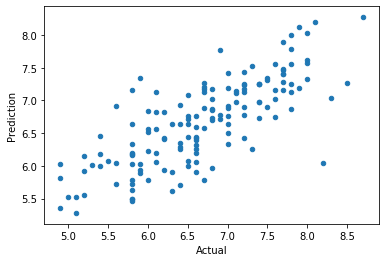

In [143]:
# Plotting predictions for Lasso
results.plot(x='Actual', y='Prediction', kind='scatter')

In [155]:
# ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.589483


In [151]:
# Make predictions for EnelasticNet
results = pd.DataFrame({"Prediction": y_pred_enet, "Actual": y_test}).reset_index(drop=True)
results.head(20)
# results['Prediction'].sum()

,Prediction,Actual
0,6.067215,5.8
1,7.308773,7.7
2,7.353023,7.4
3,5.573933,5.0
4,7.126878,7.1
5,7.574354,7.2
6,6.969785,6.7
7,7.258527,6.7
8,6.271827,6.2
9,6.891492,7.2


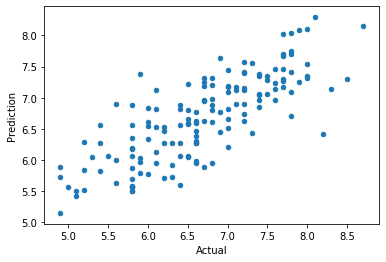

In [152]:
# Plotting predictions for EnelasticNet
results.plot(x='Actual', y='Prediction', kind='scatter')